In [1]:
"Set working directory"
import os
os.chdir('../')


In [2]:
import pickle 

from socpd.model_nw_exp import SocPD
from socpd.sample import Sample, IntRange, Values, Range
from socpd.experiment import Experiment

# Visualization
import matplotlib
import matplotlib.pyplot as plt
#from socpd.nw_animation import generate_animation
#from socpd.visualization import animate
#import IPython

%matplotlib inline
matplotlib.rcdefaults()
matplotlib.rcParams['animation.embed_limit'] = 2**128
import seaborn as sns


Pop - m - normal Barabási–Alber model.

In [3]:
""" For experiment, Hypothesis_settings is pre-set in model_nw_exp.py"""
parameters = {'pop' : Values(1000,2000,3000,4000,5000,6000), # size of the population
            'm': Values(1,2,3),# Number of edges with which a new node attaches to existing nodes
            'p' : 0, # each existing nodes has p prob to form m new link(s) to the others with attachment preference
            'q' : 0, # each existing nodes has q prob to rewire m existing link(s) with attachment preference
            'steps': 10,
            #'use_ipf': False,   
            }

sample = Sample( parameters)
"""   n = 4, 
    method='saltelli',
    calc_second_order = False)"""

exp_pop_m = Experiment(SocPD, sample, iterations=5)
results_pop_m = exp_pop_m.run(n_jobs=-1, verbose = True)


Scheduled runs: 90


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   16.6s


Experiment finished
Run time: 0:01:40.586822


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.7min finished


m - p

In [4]:
""" For experiment, Hypothesis_settings is pre-set in model_nw_exp.py"""
parameters = {'pop' : 1000, # size of the population
            'm': Values(1,2,3), # Number of edges with which a new node attaches to existing nodes
            'p' : Values(0, 0.6, 0.8, 0.9), # each existing nodes has p prob to form m new link(s) to the others with attachment preference
            'q' : 0, # each existing nodes has q prob to rewire m existing link(s) with attachment preference
            'steps': 10,
            #'use_ipf': False,   
            }

sample = Sample(
    parameters,

)

exp_m_p = Experiment(SocPD, sample, iterations=5)
results_m_p = exp_m_p.run(n_jobs=-1, verbose = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Scheduled runs: 60


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   13.7s


Experiment finished
Run time: 0:09:29.977977


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.5min finished


m-q

In [5]:
""" For experiment, Hypothesis_settings is pre-set in model_nw_exp.py"""
parameters = {'pop' : 1000, # size of the population
            'm': Values(1,2,3), # Number of edges with which a new node attaches to existing nodes
            'p' : 0, # each existing nodes has p prob to form m new link(s) to the others with attachment preference
            'q' : Values(0, 0.1, 0.3, 0.5, 0.7), # each existing nodes has q prob to rewire m existing link(s) with attachment preference
            'steps': 10,
            #'use_ipf': False,   
            }

sample = Sample(
    parameters,)

exp_m_q = Experiment(SocPD, sample, iterations=5)
results_m_q = exp_m_q.run(n_jobs=-1, verbose = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Scheduled runs: 75


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    9.9s


Experiment finished
Run time: 0:00:32.429305


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   32.3s finished


p-q / q-p

In [6]:
""" For experiment, Hypothesis_settings is pre-set in model_nw_exp.py"""
parameters = {'pop' : 1000, # size of the population
               'm': 1, # Number of edges with which a new node attaches to existing nodes
               'p' : Values(0.5, 0.6, 0.7, 0.8), # each existing nodes has p prob to form m new link(s) to the others with attachment preference
               'q' : Values(0.05, 0.1, 0.15), # each existing nodes has q prob to rewire m existing link(s) with attachment preference
               'steps': 10 }

sample = Sample(parameters,)

exp_p_q = Experiment(SocPD, sample, iterations=5)
results_p_q = exp_p_q.run(n_jobs=-1, verbose = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Scheduled runs: 60


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   12.8s


Experiment finished
Run time: 0:02:21.801199


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.4min finished


In [7]:
""" For experiment, Hypothesis_settings is pre-set in model_nw_exp.py"""
parameters = {'pop' : 1000, # size of the population
               'm': 1, # Number of edges with which a new node attaches to existing nodes
               'p' : Values(0.05, 0.1, 0.15), # each existing nodes has p prob to form m new link(s) to the others with attachment preference
               'q' : Values(0.5, 0.6, 0.7, 0.8), # each existing nodes has q prob to rewire m existing link(s) with attachment preference
               'steps': 10 }

sample = Sample(parameters,)

exp_q_p= Experiment(SocPD, sample, iterations=5)
results_q_p = exp_q_p.run(n_jobs=-1, verbose = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Scheduled runs: 60


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   11.3s


Experiment finished
Run time: 0:00:43.098325


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   43.0s finished


Sensitivity analysis

In [8]:
""" For experiment, Hypothesis_settings is pre-set in model_nw_exp.py"""
parameters = {'pop' : IntRange(1000, 6000), # size of the population
            'm': IntRange(1, 4),# Number of edges with which a new node attaches to existing nodes
            'p' : Range(0, 0.85), # each existing nodes has p prob to form m new link(s) to the others with attachment preference
            'q' : Range(0, 0.1), # each existing nodes has q prob to rewire m existing link(s) with attachment preference
            'steps': 5 #'use_ipf': False,   
            }

sample = Sample( parameters,
                n = 4, 
               method='saltelli',
               calc_second_order = False)

exp_gen = Experiment(SocPD, sample, iterations=5)
results = exp_gen.run(n_jobs=-2, verbose = True)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.


Scheduled runs: 120


[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:   25.3s


Experiment finished
Run time: 3:10:27.892652


[Parallel(n_jobs=-2)]: Done 120 out of 120 | elapsed: 190.5min finished


In [17]:
with open('exp_results_nw/pop_m.pickle', 'wb') as handle:
    pickle.dump(results_pop_m, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('exp_results_nw/p_m.pickle', 'wb') as handle:
    pickle.dump(results_m_p, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('exp_results_nw/q_m.pickle', 'wb') as handle:
    pickle.dump(results_m_q, handle, protocol=pickle.HIGHEST_PROTOCOL)
       
with open('exp_results_nw/p_q.pickle', 'wb') as handle:
    pickle.dump(results_p_q, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('exp_results_nw/q_p.pickle', 'wb') as handle:
    pickle.dump(results_q_p, handle, protocol=pickle.HIGHEST_PROTOCOL)  

with open('exp_results_nw/gen_results.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)  




In [20]:
results_list = [results_pop_m, results_m_p, results_m_q, results_p_q, results_q_p]
list_row_plot = ['Max_nw_size','Avg_nw_size', 'Min_nw_size', 'Final_vegetarian_proportion', 'Peak_vegetarian_proportion']
x_hue = [['pop', 'm'], ['p', 'm'], ['q', 'm'], ['p', 'q'], ['q', 'p']]

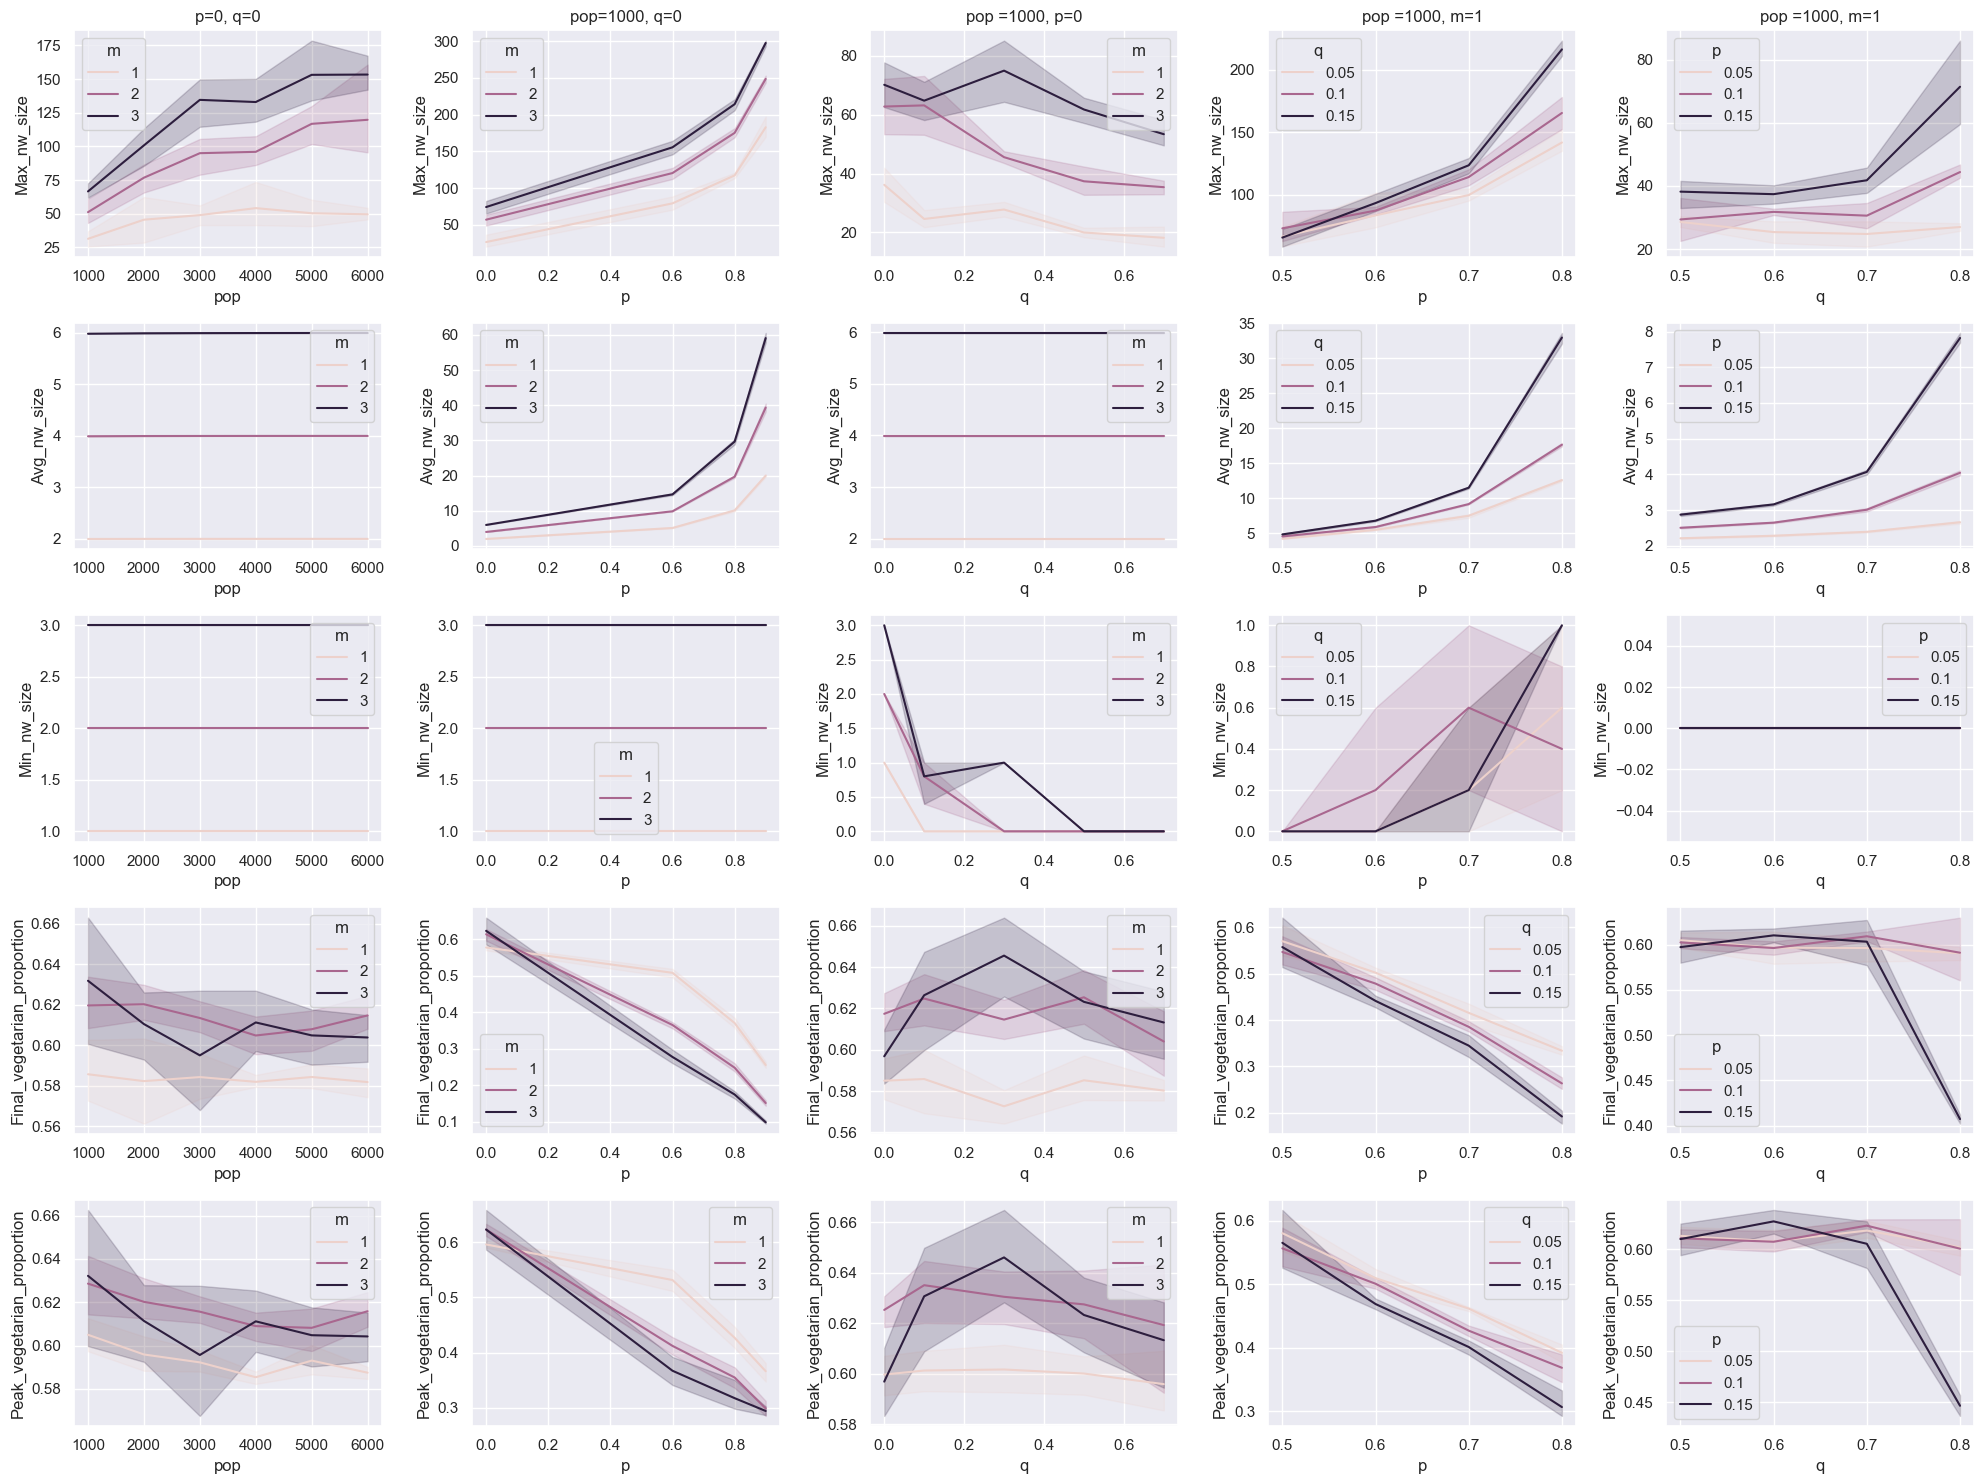

In [30]:
fig, axs = plt.subplots(5, 5,figsize=(20,15))
sns.set_theme()
for i, res in enumerate(results_list):
   for k, plot_type in enumerate(list_row_plot):
      sns.lineplot(
         data=res.arrange_reporters(),
         ax = axs[k,i],
         x=x_hue[i][0],
         y=plot_type,
         hue=x_hue[i][1]
      )
axs[0,0].set_title('p=0, q=0')
axs[0,1].set_title('pop=1000, q=0')
axs[0,2].set_title('pop =1000, p=0')
axs[0,3].set_title('pop =1000, m=1')
axs[0,4].set_title('pop =1000, m=1')
plt.tight_layout()


In [33]:
fig.savefig('pairing_nw_params.png')

In [47]:
si_list = results.sensitivity.sobol.groupby(by='reporter')


key = [i for i,_ in si_list]
key

['Avg_nw_size',
 'Final_vegetarian_proportion',
 'Max_nw_size',
 'Min_nw_size',
 'Peak_vegetarian_proportion',
 "intervention's effect-env_beta",
 'use_ipf']

In [34]:
results.calc_sobol()

c:\Users\Eigenaar\1. my_folder\6.WUR\Planetary diet\ABM\SOCPD\socpd\datadict.py:148: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reporters_df = self.reporters.groupby('sample_id').mean()
c:\Users\Eigenaar\AppData\Local\Programs\Python\Python310\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()
c:\Users\Eigenaar\AppData\Local\Programs\Python\Python310\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


DataDict {
'info': Dictionary with 12 keys
'parameters': 
    'constants': Dictionary with 1 key
    'sample': DataFrame with 4 variables and 24 rows
    'log': Dictionary with 5 keys
'reporters': DataFrame with 8 variables and 120 rows
'sensitivity': 
    'sobol': DataFrame with 2 variables and 28 rows
    'sobol_conf': DataFrame with 2 variables and 28 rows
}

In [37]:
results.sensitivity.sobol_conf.groupby(by='reporter')

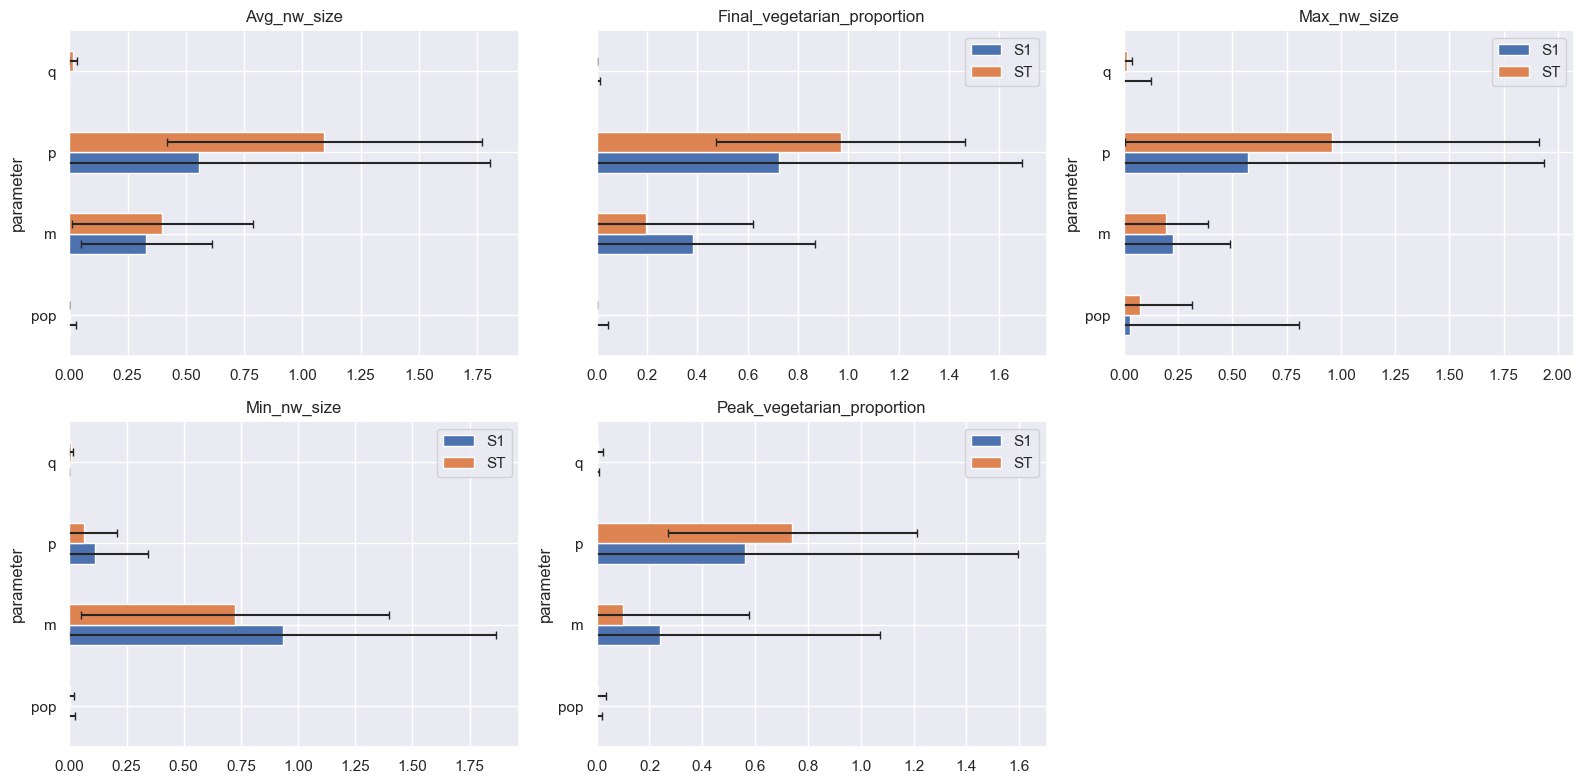

In [76]:
def plot_sobol(results):
    """ Bar plot of Sobol sensitivity indices. """

    sns.set()
    fig, axs = plt.subplots(2,3, figsize=(16, 8))
    axs = axs.flatten()
    
    
    si_list = results.sensitivity.sobol.groupby(by='reporter')
    si_conf_list = results.sensitivity.sobol_conf.groupby(by='reporter')
    for (key, si), (_, err), ax in zip(si_list, si_conf_list, axs[:5]):
        si = si.droplevel('reporter')
        err = err.droplevel('reporter')
        si.plot.barh(xerr=err, title=key, ax=ax, capsize = 3)
        ax.set_xlim(0)
            
            

    axs[0].get_legend().remove()
    axs[1].set(ylabel=None, yticklabels=[])
    axs[1].tick_params(left=False)
    fig.delaxes(axs[-1])
    
    plt.tight_layout()

plot_sobol(results)

In [82]:
results.parameters.sample.keys()

Index(['pop', 'm', 'p', 'q'], dtype='object')

In [110]:
def plot_sensitivity(results, var_list, ylimf,ylimt):
    """ Show average simulation results for different parameter values. """

    sns.set()
    fig, axs = plt.subplots(2,2, figsize=(12, 10))
    axs = [i for j in axs for i in j] # Flatten list

    data = results.arrange_reporters().astype('float')
    params = results.parameters.sample.keys()

    for x, ax in zip(params, axs):
        for y in var_list:
            sns.regplot(x=x, y=y, data=data, ax=ax, 
                        x_bins=15, fit_reg=False, label=y, )
        ax.set_ylim(ylimf,ylimt)
        ax.set_ylabel('')
        ax.legend()

    plt.tight_layout()


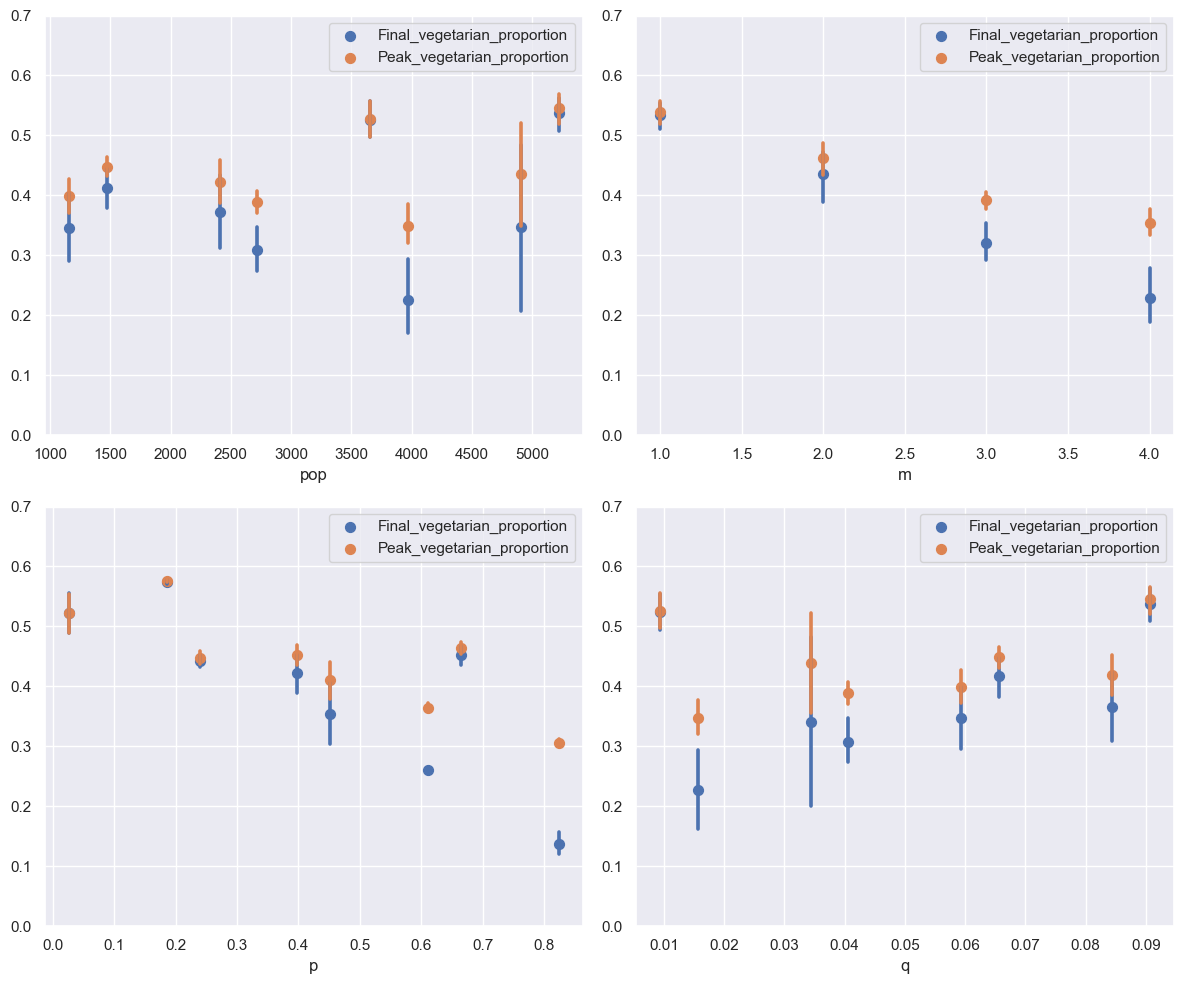

In [111]:
plot_sensitivity(results, ['Final_vegetarian_proportion','Peak_vegetarian_proportion'],0,0.7)

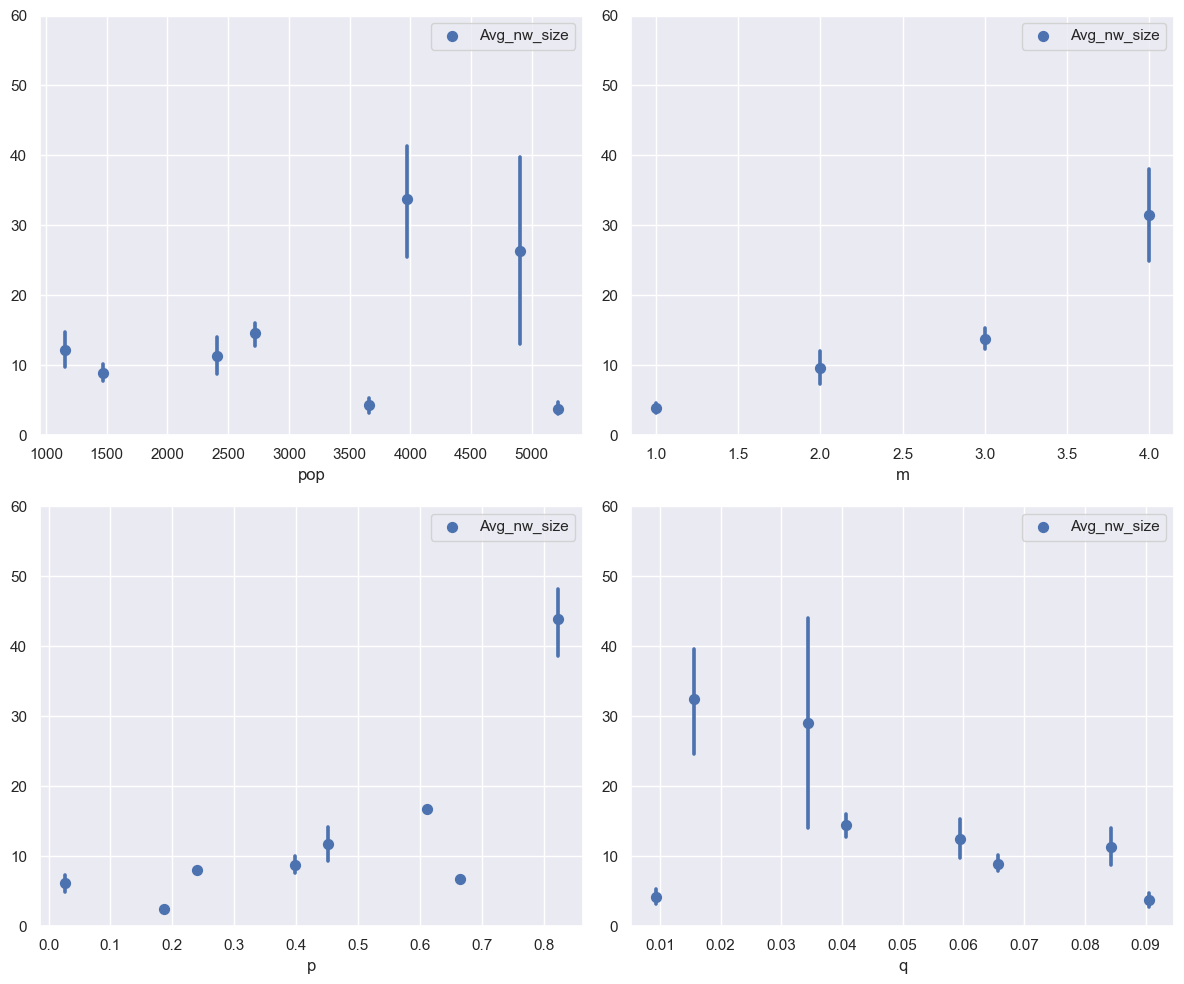

In [112]:
plot_sensitivity(results, ['Avg_nw_size'],0,60)

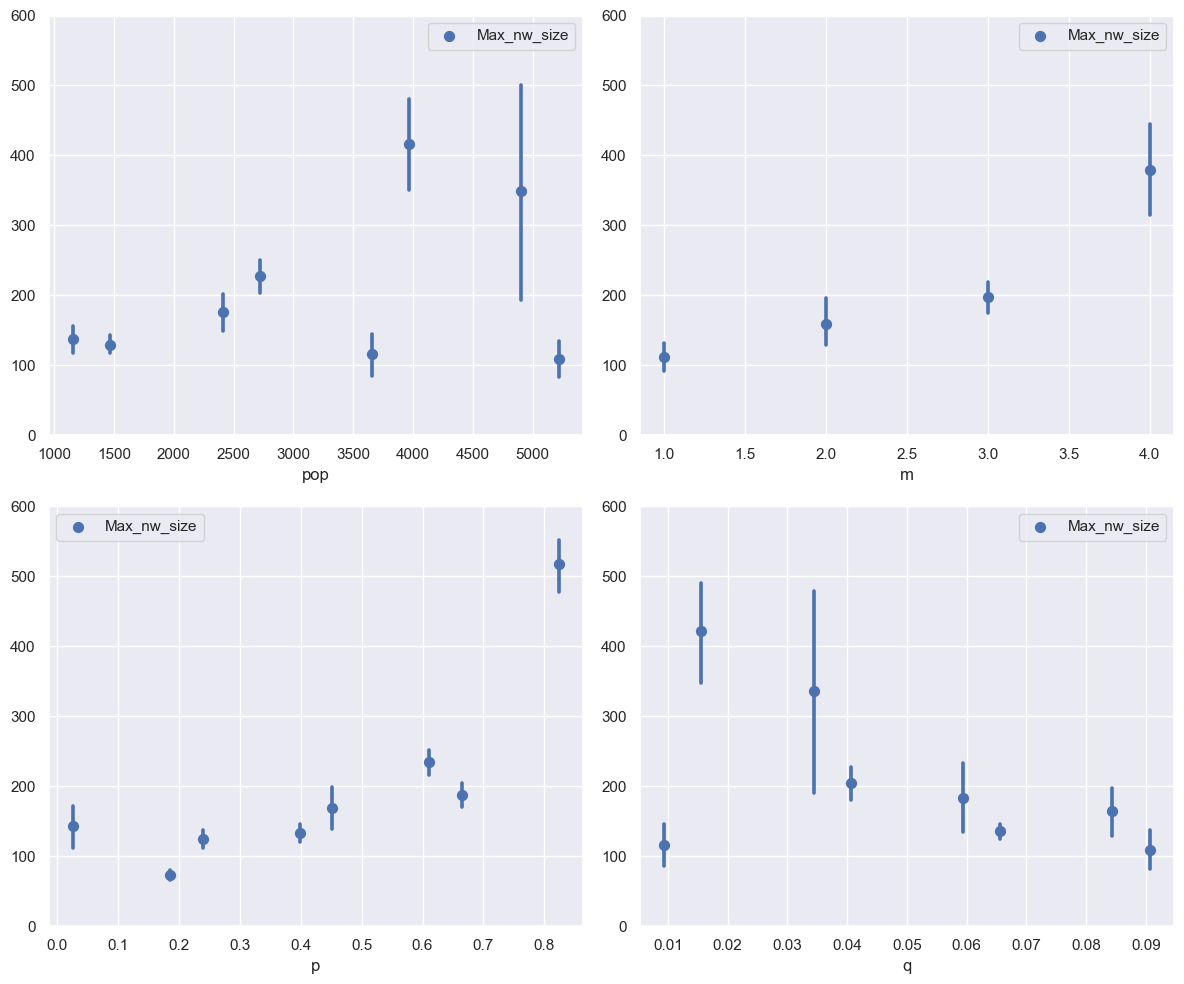

In [116]:
plot_sensitivity(results, ['Max_nw_size'],0,600)

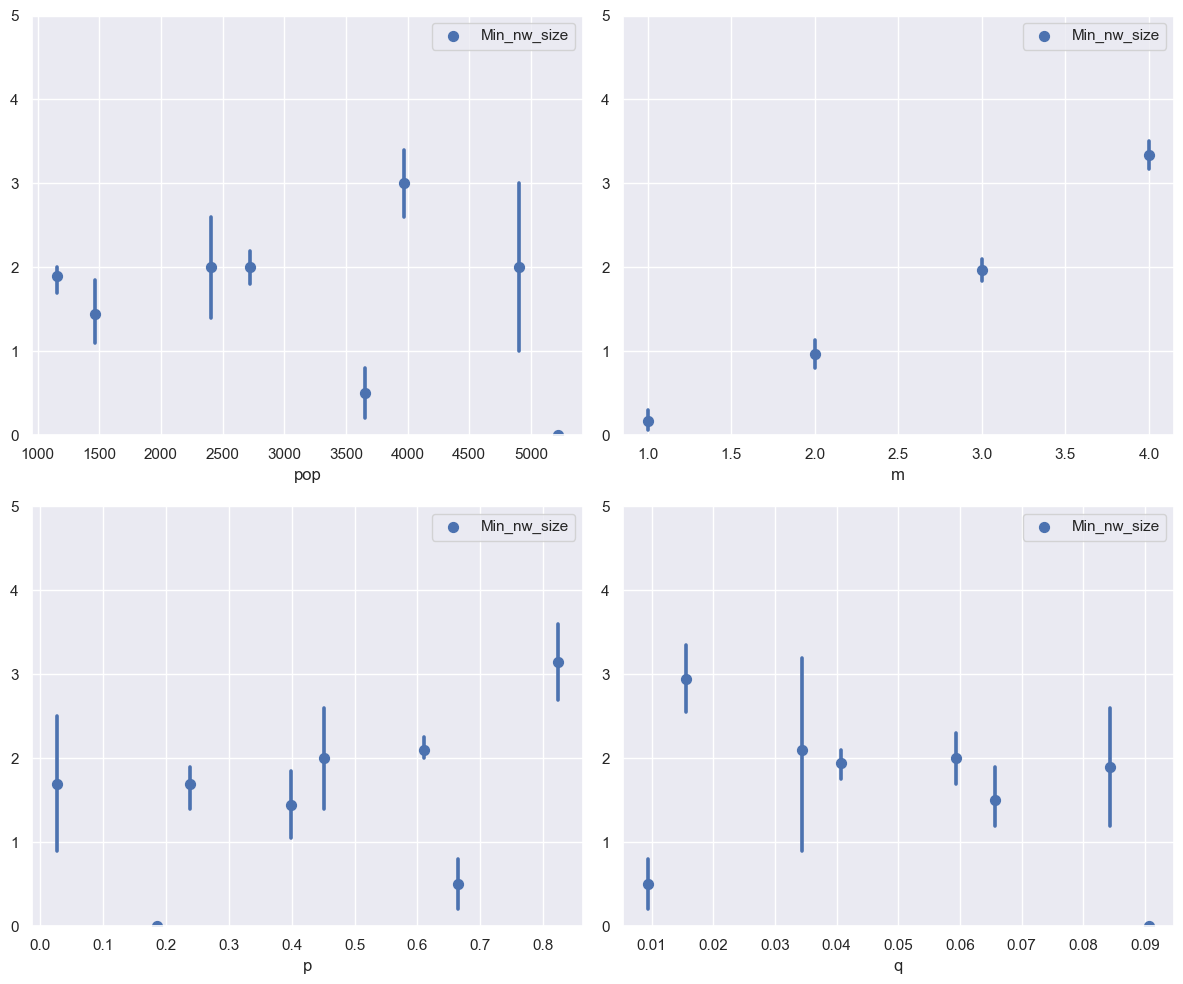

In [119]:
plot_sensitivity(results, ['Min_nw_size'],0,5)

In [9]:
plot_sensitivity(results, ['Min_nw_size'],0,5)

Experiment 3: Pop - p